# COM-480 Milestone 1
## Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from pycountry_convert import country_alpha2_to_country_name
%matplotlib inline

In [2]:
data = pd.read_csv("./data/big_five_scores.csv")

data["sex"]=data["sex"].map({1:"Male",2:"Female"})
data.rename({'agreeable_score': 'agreeableness', 
             'extraversion_score': 'extraversion',
             'openness_score': 'openness',
             'conscientiousness_score': 'conscientiousness',
             'neuroticiscm_score': 'neuroticism'},
            axis = 'columns', inplace = True)
traits = data.columns[4:]
data.head()

,case_id,country,age,sex,agreeableness,extraversion,openness,conscientiousness,neuroticism_score
0,1,South Afri,24,Male,0.753333,0.496667,0.803333,0.886667,0.426667
1,3,UK,24,Female,0.733333,0.680000,0.786667,0.746667,0.590000
2,4,USA,36,Female,0.880000,0.770000,0.860000,0.896667,0.296667
3,5,UK,19,Male,0.690000,0.616667,0.716667,0.636667,0.563333
4,6,UK,17,Male,0.600000,0.713333,0.646667,0.633333,0.513333


In [3]:
data.loc[data.isna().any(axis=1)]

,case_id,country,age,sex,agreeableness,extraversion,openness,conscientiousness,neuroticism_score
4278,4629,NaN,14,Male,0.603333,0.656667,0.630000,0.630000,0.766667
5142,5576,NaN,16,Female,0.606667,0.776667,0.660000,0.710000,0.533333
5561,6032,NaN,13,Female,0.723333,0.706667,0.680000,0.706667,0.426667
8602,9359,NaN,29,Female,0.593333,0.506667,0.703333,0.663333,0.606667
9062,9852,NaN,45,Female,0.750000,0.766667,0.763333,0.796667,0.403333
...,...,...,...,...,...,...,...,...,...
305059,331630,NaN,18,Female,0.740000,0.606667,0.750000,0.686667,0.650000
305283,331881,NaN,18,Male,0.840000,0.650000,0.743333,0.610000,0.460000
305286,331884,NaN,18,Male,0.583333,0.436667,0.630000,0.970000,0.260000
305921,332565,NaN,42,Female,0.850000,0.700000,0.670000,0.916667,0.550000


In [4]:
data=data.dropna(axis=0)

<AxesSubplot:title={'center':'Correlation between the different traits among subjects'}>

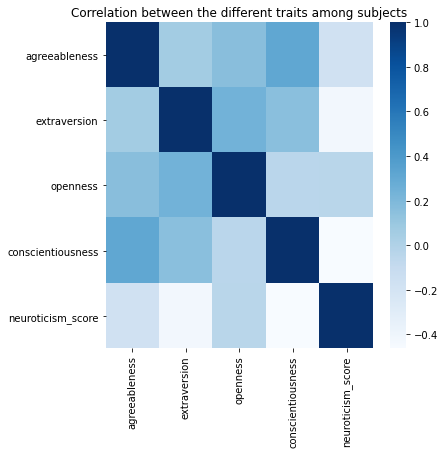

In [5]:
#@title
plt.figure(figsize=(6,6))
plt.title("Correlation between the different traits among subjects")
sns.heatmap(data[traits].corr(), cmap = 'Blues')

### Converting country names to ISO 3166-1 alpha-2 code
Most were converted using [pycountry-convert](https://pypi.org/project/pycountry-convert/). Truncated names were mapped manually. Some ambiguities could not be resolved (e.g. "Republic o"). We discarded these, but they only represent around 250 entries. 

In [6]:
country_map = json.load(open("./codes_dict.json", 'r' ))
data.country = data.country.map(country_map)
print('{:d} entries could not be mapped to a alpha 2 code'.format(len(data[data.country == '?'])))
data = data[data.country != '?']
data=data.dropna(axis=0)

245 entries could not be mapped to a alpha 2 code


In [7]:
data["country"].nunique()

223

In [8]:
sorted(data["country"].unique())[:20]

['AD',
 'AE',
 'AF',
 'AG',
 'AI',
 'AL',
 'AM',
 'AO',
 'AQ',
 'AR',
 'AT',
 'AU',
 'AW',
 'AZ',
 'BA',
 'BB',
 'BD',
 'BE',
 'BF',
 'BG']

In [9]:
data["country"].value_counts().sort_values(ascending=False)

US    212625
CA     21798
GB     16489
AU     10400
NL      3469
       ...  
GQ         1
MR         1
LI         1
GW         1
SM         1
Name: country, Length: 223, dtype: int64

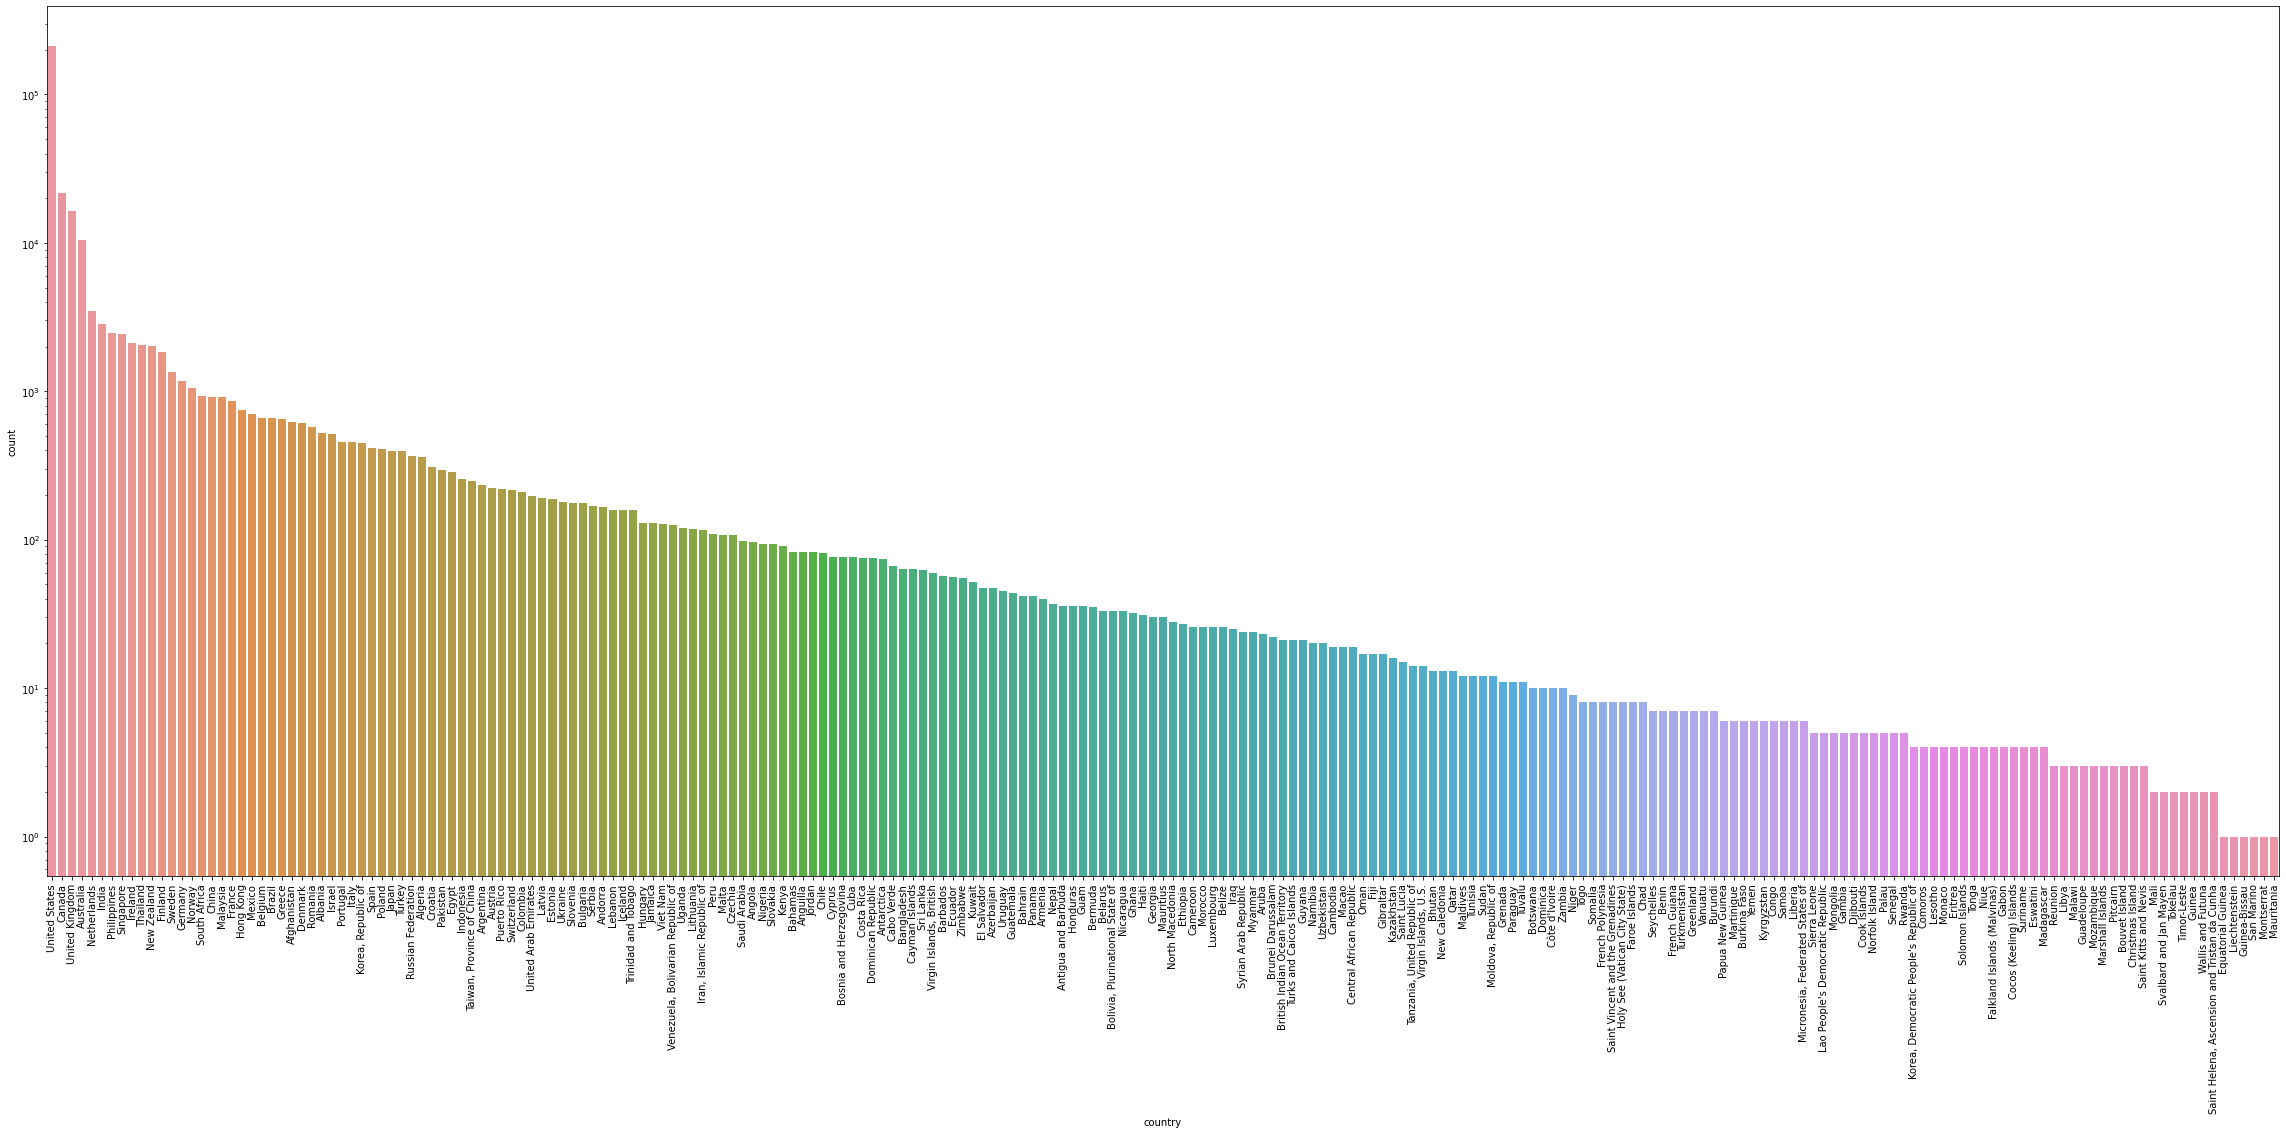

In [10]:
data.country = data.country.map(lambda x: country_alpha2_to_country_name(x))

plt.figure(figsize=(40,16))
chart=sns.countplot(data=data,x="country",order=data["country"].value_counts().index)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
plt.yscale("log")

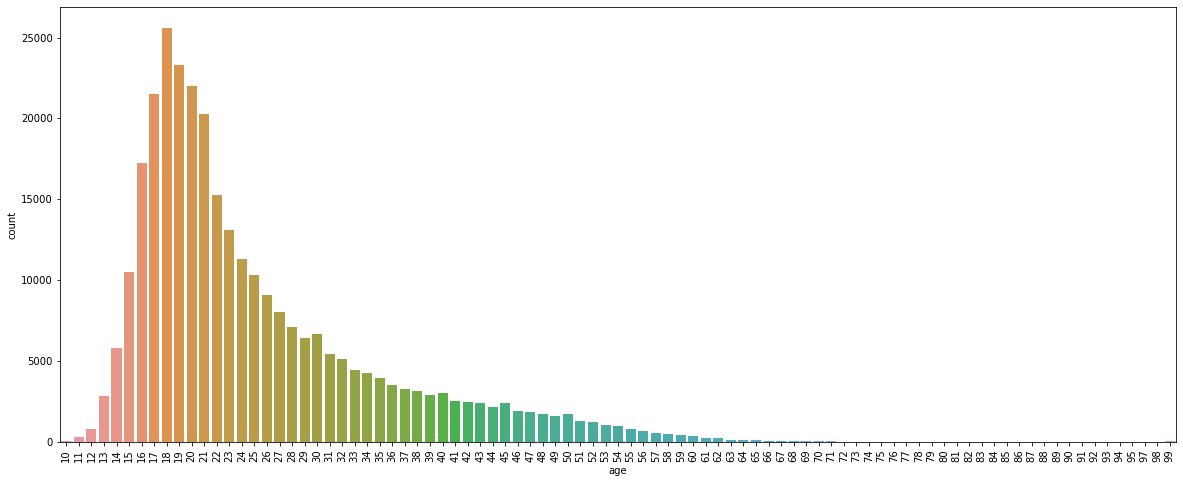

In [11]:
plt.figure(figsize=(20,8));
chart=sns.countplot(data=data,x="age");
chart.set_xticklabels(chart.get_xticklabels(),rotation=90);

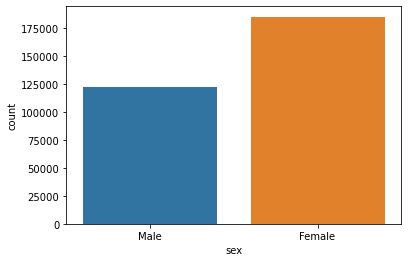

In [12]:
sns.countplot(data=data,x="sex");

In [13]:
sex_data = data.groupby(["sex"])
age_data = data.groupby(["age"])
country_data = data.groupby(["country"])
sex_age_data = data.groupby(["sex","age"])
age_country_data = data.groupby(["age","country"])
sex_country_data = data.groupby(["sex","country"])

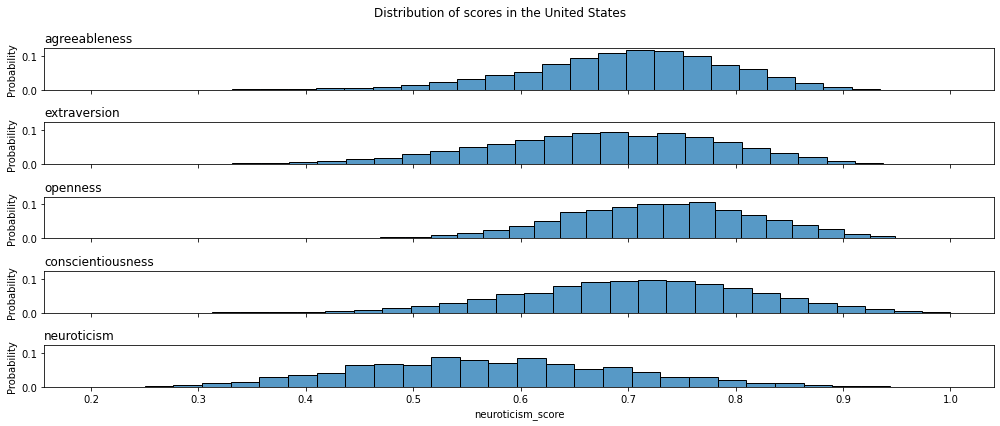

In [14]:
f, ax = plt.subplots(5, 1, figsize = (14, 6), sharey = True, sharex = True)
plt.suptitle('Distribution of scores in the United States')
US = data[data.country == 'United States']
for i, trait in enumerate(traits):
    sns.histplot(US[trait], ax = ax[i], bins = 30, stat = 'probability')
    ax[i].set_title(trait.split('_')[0], loc = 'left')
    
plt.tight_layout()